In [10]:
import pandas as pd
import re
df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [11]:
df.head()

,Date,Title,Review,Rating,Ratings_Col
0,4 July 2021,An important film not just as a watershed mome...,When Marion Crane Janey Leigh sees an opportun...,9.0,positive
1,12 May 2016,Arguably the best movie of 2016,Wow This one word would describe the movie apt...,10.0,positive
2,21 August 2010,Superb,Clint Eastwood is a legendary film personality...,8.0,positive
3,15 April 2017,Hollywood needs to pull their heads out of the...,I am quite unsure what this romantic notion of...,2.0,negative
4,3 May 2007,It stays with you,Se7en is an excellent thriller Sure it might b...,10.0,positive


In [12]:
final_df = pd.concat([df,test_df])
len(final_df)

38452

In [13]:
def preprocess(text: str)->str:
    text = re.sub(r"([!\"'#$%&()*\+,-./:;<=>?@\\\[\]^_`{|}~])", r" \1 ", text)  # add spacing
    text = re.sub("[^A-Za-z0-9]+", " ", text)  # remove non alphanumeric chars
    text = re.sub(" +", " ", text)  # remove multiple spaces
    text = text.strip()  # strip white space at the ends
    text = re.sub(r"http\S+", "", text)  # remove links

    return text

In [14]:
final_df['Review'] = final_df['Review'].apply(preprocess)
final_df['Title'] = final_df['Title'].apply(preprocess)

TypeError: expected string or bytes-like object

In [ ]:
final_df.head()

,Date,Title,Review,Rating,Ratings_Col
0,27 April 2018,A must see for musicians and artists,This movie is exceptionally emotional not sapp...,10.0,positive
1,8 October 2022,Best film I ever watched after Interstellar,I have trouble turning off my brain Anxieties ...,10.0,positive
2,11 January 2004,unbeleavable film that provokes many emotions,The title of this movie has a big significance...,10.0,positive
3,27 December 2017,Captain America Survivor Series leave your bra...,What impresses me about this movie is how much...,1.0,negative
4,12 May 2005,Must Watch Caprio Blanchett have done a great Job,Plot Outline The movie traces the life of mill...,9.0,positive


In [38]:
def conditions(ratings_df):
    if 1<=ratings_df['Rating']<=3: return 'negative'
    if 4<=ratings_df['Rating']<=7: return 'neutral'
    if 8<=ratings_df['Rating']<=10: return 'positive'

final_df['Ratings_Col'] = final_df.apply(conditions,axis=1)

In [39]:
from sklearn.model_selection import train_test_split

train_df,test_df = train_test_split(final_df,test_size=0.2,stratify=final_df['Ratings_Col'],shuffle=True,random_state=42)

In [40]:
train_df.to_csv('train.csv',index=False)
test_df.to_csv('test.csv',index=False)

In [43]:
train_df.head()

,Date,Title,Review,Rating,Ratings_Col
7035,4 July 2021,An important film not just as a watershed mome...,When Marion Crane Janey Leigh sees an opportun...,9.0,positive
6518,12 May 2016,Arguably the best movie of 2016,Wow This one word would describe the movie apt...,10.0,positive
7380,21 August 2010,Superb,Clint Eastwood is a legendary film personality...,8.0,positive
24260,15 April 2017,Hollywood needs to pull their heads out of the...,I am quite unsure what this romantic notion of...,2.0,negative
7959,3 May 2007,It stays with you,Se7en is an excellent thriller Sure it might b...,10.0,positive


<Axes: xlabel='Ratings_Col'>

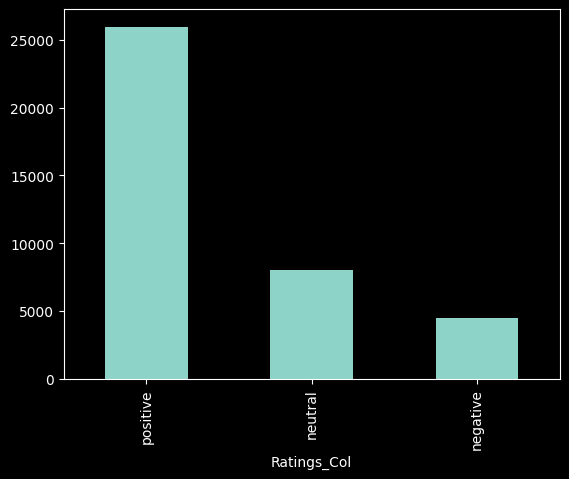

In [41]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
final_df['Ratings_Col'].value_counts().plot(kind="bar")

In [15]:
from process_data import get_train_data
train_ds,val_ds, preprocessor = get_train_data("train.csv")

2023-10-04 01:17:08,415	INFO worker.py:1633 -- Started a local Ray instance. View the dashboard at 127.0.0.1:8265 
2023-10-04 01:17:11,014	INFO read_api.py:406 -- To satisfy the requested parallelism of 39, each read task output is split into 39 smaller blocks.
2023-10-04 01:17:11,051	INFO streaming_executor.py:93 -- Executing DAG InputDataBuffer[Input] -> TaskPoolMapOperator[ReadCSV->SplitBlocks(39)] -> AllToAllOperator[RandomShuffle] -> LimitOperator[limit=1]
2023-10-04 01:17:11,054	INFO streaming_executor.py:94 -- Execution config: ExecutionOptions(resource_limits=ExecutionResources(cpu=None, gpu=None, object_store_memory=None), locality_with_output=False, preserve_order=True, actor_locality_enabled=True, verbose_progress=False)
2023-10-04 01:17:11,056	INFO streaming_executor.py:96 -- Tip: For detailed progress reporting, run `ray.data.DataContext.get_current().execution_options.verbose_progress = True`


- RandomShuffle 1:   0%|          | 0/1521 [00:00<?, ?it/s]

Shuffle Map 2:   0%|          | 0/1521 [00:00<?, ?it/s]

Shuffle Reduce 3:   0%|          | 0/1521 [00:00<?, ?it/s]

Running 0:   0%|          | 0/1 [00:00<?, ?it/s]

2023-10-04 01:17:13,918	INFO streaming_executor.py:93 -- Executing DAG InputDataBuffer[Input] -> TaskPoolMapOperator[ReadCSV->SplitBlocks(39)] -> AllToAllOperator[RandomShuffle] -> AllToAllOperator[Sort] -> AllToAllOperator[MapBatches(group_fn)->MapBatches(_filter_split)->RandomShuffle] -> LimitOperator[limit=1]
2023-10-04 01:17:13,920	INFO streaming_executor.py:94 -- Execution config: ExecutionOptions(resource_limits=ExecutionResources(cpu=None, gpu=None, object_store_memory=None), locality_with_output=False, preserve_order=True, actor_locality_enabled=True, verbose_progress=False)
2023-10-04 01:17:13,921	INFO streaming_executor.py:96 -- Tip: For detailed progress reporting, run `ray.data.DataContext.get_current().execution_options.verbose_progress = True`


- RandomShuffle 1:   0%|          | 0/1521 [00:00<?, ?it/s]

Shuffle Map 2:   0%|          | 0/1521 [00:00<?, ?it/s]

Shuffle Reduce 3:   0%|          | 0/1521 [00:00<?, ?it/s]

- Sort 4:   0%|          | 0/1521 [00:00<?, ?it/s]

Sort Sample 5:   0%|          | 0/1521 [00:00<?, ?it/s]

Shuffle Map 6:   0%|          | 0/1521 [00:00<?, ?it/s]

Shuffle Reduce 7:   0%|          | 0/1521 [00:00<?, ?it/s]

- MapBatches(group_fn)->MapBatches(_filter_split)->RandomShuffle 8:   0%|          | 0/1521 [00:00<?, ?it/s]

Shuffle Map 9:   0%|          | 0/1521 [00:00<?, ?it/s]

Shuffle Reduce 10:   0%|          | 0/1521 [00:00<?, ?it/s]

Running 0:   0%|          | 0/1 [00:00<?, ?it/s]

Sort Sample 0:   0%|          | 0/39 [00:00<?, ?it/s]

2023-10-04 01:17:17,898	INFO streaming_executor.py:93 -- Executing DAG InputDataBuffer[Input] -> TaskPoolMapOperator[ReadCSV->SplitBlocks(39)] -> AllToAllOperator[RandomShuffle] -> AllToAllOperator[Sort] -> AllToAllOperator[MapBatches(group_fn)->MapBatches(_filter_split)->RandomShuffle] -> AllToAllOperator[Aggregate] -> TaskPoolMapOperator[MapBatches(<lambda>)]
2023-10-04 01:17:17,902	INFO streaming_executor.py:94 -- Execution config: ExecutionOptions(resource_limits=ExecutionResources(cpu=None, gpu=None, object_store_memory=None), locality_with_output=False, preserve_order=True, actor_locality_enabled=True, verbose_progress=False)
2023-10-04 01:17:17,903	INFO streaming_executor.py:96 -- Tip: For detailed progress reporting, run `ray.data.DataContext.get_current().execution_options.verbose_progress = True`


- RandomShuffle 1:   0%|          | 0/1521 [00:00<?, ?it/s]

Shuffle Map 2:   0%|          | 0/1521 [00:00<?, ?it/s]

Shuffle Reduce 3:   0%|          | 0/1521 [00:00<?, ?it/s]

- Sort 4:   0%|          | 0/1521 [00:00<?, ?it/s]

Sort Sample 5:   0%|          | 0/1521 [00:00<?, ?it/s]

Shuffle Map 6:   0%|          | 0/1521 [00:00<?, ?it/s]

Shuffle Reduce 7:   0%|          | 0/1521 [00:00<?, ?it/s]

- MapBatches(group_fn)->MapBatches(_filter_split)->RandomShuffle 8:   0%|          | 0/1521 [00:00<?, ?it/s]

Shuffle Map 9:   0%|          | 0/1521 [00:00<?, ?it/s]

Shuffle Reduce 10:   0%|          | 0/1521 [00:00<?, ?it/s]

- Aggregate 11:   0%|          | 0/1521 [00:00<?, ?it/s]

Shuffle Map 12:   0%|          | 0/1521 [00:00<?, ?it/s]

Shuffle Reduce 13:   0%|          | 0/1521 [00:00<?, ?it/s]

Running 0:   0%|          | 0/1521 [00:00<?, ?it/s]

Sort Sample 0:   0%|          | 0/39 [00:00<?, ?it/s]

Sort Sample 0:   0%|          | 0/39 [00:00<?, ?it/s]

2023-10-04 01:17:22,133	INFO streaming_executor.py:93 -- Executing DAG InputDataBuffer[Input] -> TaskPoolMapOperator[ReadCSV->SplitBlocks(39)] -> AllToAllOperator[RandomShuffle] -> AllToAllOperator[Sort] -> AllToAllOperator[MapBatches(group_fn)->MapBatches(_filter_split)->RandomShuffle] -> TaskPoolMapOperator[MapBatches(preprocess)]
2023-10-04 01:17:22,135	INFO streaming_executor.py:94 -- Execution config: ExecutionOptions(resource_limits=ExecutionResources(cpu=None, gpu=None, object_store_memory=None), locality_with_output=False, preserve_order=True, actor_locality_enabled=True, verbose_progress=False)
2023-10-04 01:17:22,136	INFO streaming_executor.py:96 -- Tip: For detailed progress reporting, run `ray.data.DataContext.get_current().execution_options.verbose_progress = True`


- RandomShuffle 1:   0%|          | 0/1521 [00:00<?, ?it/s]

Shuffle Map 2:   0%|          | 0/1521 [00:00<?, ?it/s]

Shuffle Reduce 3:   0%|          | 0/1521 [00:00<?, ?it/s]

- Sort 4:   0%|          | 0/1521 [00:00<?, ?it/s]

Sort Sample 5:   0%|          | 0/1521 [00:00<?, ?it/s]

Shuffle Map 6:   0%|          | 0/1521 [00:00<?, ?it/s]

Shuffle Reduce 7:   0%|          | 0/1521 [00:00<?, ?it/s]

- MapBatches(group_fn)->MapBatches(_filter_split)->RandomShuffle 8:   0%|          | 0/1521 [00:00<?, ?it/s]

Shuffle Map 9:   0%|          | 0/1521 [00:00<?, ?it/s]

Shuffle Reduce 10:   0%|          | 0/1521 [00:00<?, ?it/s]

Running 0:   0%|          | 0/1521 [00:00<?, ?it/s]

Sort Sample 0:   0%|          | 0/39 [00:00<?, ?it/s]

(MapBatches(preprocess) pid=8446) Token indices sequence length is longer than the specified maximum sequence length for this model (752 > 512). Running this sequence through the model will result in indexing errors
(MapBatches(preprocess) pid=8434) Token indices sequence length is longer than the specified maximum sequence length for this model (1146 > 512). Running this sequence through the model will result in indexing errors [repeated 20x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/ray-logging.html#log-deduplication for more options.)
2023-10-04 01:17:38,295	INFO streaming_executor.py:93 -- Executing DAG InputDataBuffer[Input] -> TaskPoolMapOperator[ReadCSV->SplitBlocks(39)] -> AllToAllOperator[RandomShuffle] -> AllToAllOperator[Sort] -> AllToAllOperator[MapBatches(group_fn)->MapBatches(_filter_split)->RandomShuffle] -> TaskPoolMapOperator[MapBatches(preprocess)]
2023-10

- RandomShuffle 1:   0%|          | 0/1521 [00:00<?, ?it/s]

Shuffle Map 2:   0%|          | 0/1521 [00:00<?, ?it/s]

Shuffle Reduce 3:   0%|          | 0/1521 [00:00<?, ?it/s]

- Sort 4:   0%|          | 0/1521 [00:00<?, ?it/s]

Sort Sample 5:   0%|          | 0/1521 [00:00<?, ?it/s]

Shuffle Map 6:   0%|          | 0/1521 [00:00<?, ?it/s]

Shuffle Reduce 7:   0%|          | 0/1521 [00:00<?, ?it/s]

- MapBatches(group_fn)->MapBatches(_filter_split)->RandomShuffle 8:   0%|          | 0/1521 [00:00<?, ?it/s]

Shuffle Map 9:   0%|          | 0/1521 [00:00<?, ?it/s]

Shuffle Reduce 10:   0%|          | 0/1521 [00:00<?, ?it/s]

Running 0:   0%|          | 0/1521 [00:00<?, ?it/s]

Sort Sample 0:   0%|          | 0/39 [00:00<?, ?it/s]

(MapBatches(preprocess) pid=8445) Token indices sequence length is longer than the specified maximum sequence length for this model (615 > 512). Running this sequence through the model will result in indexing errors [repeated 19x across cluster]


(raylet) [2023-10-04 01:18:08,394 E 8363 8363] (raylet) node_manager.cc:3007: 1 Workers (tasks / actors) killed due to memory pressure (OOM), 0 Workers crashed due to other reasons at node (ID: c2d09bb5e4e69c77292a4078cc5f3636b2363a0793f4c6614b0eace7, IP: 172.25.188.62) over the last time period. To see more information about the Workers killed on this node, use `ray logs raylet.out -ip 172.25.188.62`
(raylet) 
(raylet) Refer to the documentation on how to address the out of memory issue: https://docs.ray.io/en/latest/ray-core/scheduling/ray-oom-prevention.html. Consider provisioning more memory on this node or reducing task parallelism by requesting more CPUs per task. To adjust the kill threshold, set the environment variable `RAY_memory_usage_threshold` when starting Ray. To disable worker killing, set the environment variable `RAY_memory_monitor_refresh_ms` to zero.
(raylet) [2023-10-04 01:24:08,403 E 8363 8363] (raylet) node_manager.cc:3007: 2 Workers (tasks / actors) killed due t

1. Remove "" ""
2. Remove Permalink
3. 34 out of 42 found this helpful. Was this review helpful? Sign in to vote. Remove this
4. Remove more than one ..
5. 

In [8]:
# s = r"Aside from the constant annoying fast zoom-ins and shaky cam ""The Office"" style filming - which I can't stand, this was one heck of an enjoyable film. The two hour runtime flew by with the excellent pacing and the smooth cohesive and well-written screenplay. Jay Baruchel nailed his character with an all around great performance, as did Glenn Howerton. For that matter, all casting and performances were spot on, as was the cinematography and score. The story was mind-blowing, even if you never owned a BlackBerry, just to see a slice of Steve Jobs as the Canadian version of a small start-up becoming a world dominating tech empire, and that empire's fall from grace.
# 34 out of 42 found this helpful. Was this review helpful? Sign in to vote.
# Permalink"

test_cases = ['Hello ""There""',"Hello ... ..","Hello. Was this review helpful? Sign in to vote.", "Hello 3 out of 4 found this helpful"]
import re
sr = []
for s in test_cases:
    s = re.sub("Was this review helpful? Sign in to vote.","",s)
    s = re.sub("Permalink","",s)
    s = re.sub(r"\.\.\.","",s)
    s = re.sub(r"\.\.","",s)
    s = re.sub('""','',s)
    s = re.sub(r'\d+ out of \d+ found this helpful','',s)
    sr.append(s)

In [9]:
sr

['Hello There',
 'Hello  ',
 'Hello. Was this review helpful? Sign in to vote.',
 'Hello ']